# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p
from sklearn.metrics import mean_absolute_error

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [4]:
# Learn the glass data
data = []
with open("glass.data", "r") as file:
    data_set = file.read().splitlines()

#separate each line into a list and append to data
for line in data_set:
    data.append(line.split(","))

#convert the data into an array
Data_Set_df = pd.DataFrame(data)
data = Data_Set_df.to_numpy()
data = data.astype(np.float64)  # Convert strings to floats

X = data[:, 1:-1]  # Ignore column with ID numbers because will cause overfitting
y = data[:, -1]

# Training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = KNeighborsClassifier().fit(X_train, y_train)
print("Training Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))
print()
print("______Output Probabilities______")
print(clf.predict_proba(X_test))
print()

for p in [1, 2, 3, 5, 10, 100, 500, 1000]:
    clf = KNeighborsClassifier(p=p).fit(X_train, y_train)
    print(f"----p-value of {p}-----")
    print("Training Accuracy:", clf.score(X_train, y_train))
    print("Test Accuracy:", clf.score(X_test, y_test))

print("______Output Probabilities For p-value of 10,000______")
print(clf.predict_proba(X_test))
print()

Training Accuracy: 0.7368421052631579
Test Accuracy: 0.7441860465116279

______Output Probabilities______
[[0.2 0.6 0.  0.  0.  0.2]
 [0.  1.  0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  0.2 0.  0.4 0.  0.4]
 [0.2 0.2 0.4 0.  0.  0.2]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.2 0.6 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.2 0.  0.2 0.  0.4 0.2]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.  0.8 0.  0.2 0.  0. ]
 [0.6 0.  0.4 0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.8 0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.4 0.  0.4 0.  0.  0.2]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.2 0.  0.  0.8 0. ]
 [0.4 0.  0.4 0.  0.  0.2]
 [0.4 0.  0.6 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0

Discussion

For this problem, I used the glass data set and ran a KNN classification on it to see how well the algorithm can predict the type of glass for this specific data set. To avoid overfit, I excluded the ID number feature, which had a different value for each instance. After running the model with an 80%-20% training-test split, the training set typically had an accuracy of about 75% and a test accuracy of 67%. These numbers were lower than I expected. I think that this means that the data set was difficult to separate.

I also printed out the output probabilities.About half ot the test set had 100% probability that the specific instance belonged to a particular class. And, the other data points always had 2-3 possible classes, with probabilities ranging from 20-80%. This is likely because the model used a default of 5 nearest neighbors. These numbers derived from the ratios of each class in the 5 closest neighbors.

After my original test, I ran the same model on the data with various different values for p. This represents the Minkowski exponent, which is part of determine the formula used to calculate the distance. To my surprise, the various values for p did not have a large effect on the test and training accuracies of the model. I think that this occured because the data set was small. The only noticeable difference was the decrease in training accuracy when I choose a very large p-value of 1000. This likely occured because the number was so large that it led to very different results on the distance metric.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [5]:
# Learn magic telescope data

# Import the data from iris.arff
Data_Set = arff.loadarff('magic_telescope.arff')
iris_df = pd.DataFrame(Data_Set[0])
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets and make it binary
X = Data_Set_np[:, :-1]
X = X.astype(float)
y = Data_Set_np[:, -1]
y[y == b'g'] = 0
y[y == b'h'] = 1
y = y.astype(float)

# Training and test split
for i in range(3):
    print(f"Trial #{i+1}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    clf = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit(X_train, y_train)
    print("Training Accuracy:", clf.score(X_train, y_train))
    print("Test Accuracy:", clf.score(X_test, y_test))
    print()

Trial #1
Training Accuracy: 0.8863038906414301
Test Accuracy: 0.806782334384858

Trial #2
Training Accuracy: 0.8853838065194533
Test Accuracy: 0.7896950578338591

Trial #3
Training Accuracy: 0.8844637223974764
Test Accuracy: 0.7928496319663512



*Discussion*

For this problem, I ran the 80%-20% training-test split on the data three different times. Each time, I ran the KNN model with a k value of 3 and without normaliziation. Also, I recorded the training accuracy and test accuracy. The training accuracy was always around 88.5% and the test accuracy was about 80%. This is relatively accuracte. But, I believe that it can improve based on a better use of hyperparemeters.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [6]:
# Train/Predict with normalization

# Normalize the data with standard min-max normalization
from sklearn import preprocessing as p
X = p.MinMaxScaler().fit_transform(X)

# Train the model
for i in range(3):
    print(f"Trial #{i+1}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    clf = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit(X_train, y_train)
    print("Training Accuracy:", clf.score(X_train, y_train))
    print("Test Accuracy:", clf.score(X_test, y_test))
    print()

Trial #1
Training Accuracy: 0.9013538380651945
Test Accuracy: 0.8401682439537329

Trial #2
Training Accuracy: 0.9016824395373291
Test Accuracy: 0.8364879074658255

Trial #3
Training Accuracy: 0.9006309148264984
Test Accuracy: 0.8288643533123028



*Discuss the results of using normalized data vs. unnormalized data*

For this problem, I used sklearn's prepocessing module to normalize the data. In specific, I chose the min-max approach which sets the largest value of each feature to 1 and the smallest to 0 (with everything else somewhere in between, based on their proportions to the largest value). After this slight modification to the data, I was not surprised to see that both the training accuracy and the test accuracies increased by about 2%. This makes sense because the data set had some features with values in the hundreds and other features with values always less than one. Normalizing the data made it so that each feature had an equal impact on the distance metric used to find the nearest neighbors. In other words, it prevented large numbers from making points feel farther than they actually are from the novel inputs.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [7]:
#Train/Precdict with normalization and distance weighting
# Note: The Data is already saved as normalized
# Train the model
for i in range(3):
    print(f"Trial #{i+1}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    clf = KNeighborsClassifier(n_neighbors=3, weights="distance").fit(X_train, y_train)
    print("Training Accuracy:", clf.score(X_train, y_train))
    print("Test Accuracy:", clf.score(X_test, y_test))
    print()

Trial #1
Training Accuracy: 1.0
Test Accuracy: 0.8233438485804416

Trial #2
Training Accuracy: 1.0
Test Accuracy: 0.8225552050473186

Trial #3
Training Accuracy: 1.0
Test Accuracy: 0.8349106203995794



Comparison and Discussion

This time, using the normalized data, I also used distance weighting. This gave nodes that were closer to the inputs a larger vote for classification. This vastly improved the training accuracy, making it an outstanding 100%. Also, the test accuracy improved by about 1.5-2% I was not surprised to see these numbers improve because the nodes that are closer are more likely to give more accurate predictions (since they share more similar features). But, I was surprised by how much the training accuracy improved. So, it is possible that this model overfit the data. This makes me wonder how the different k-values may affect the accuracy.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

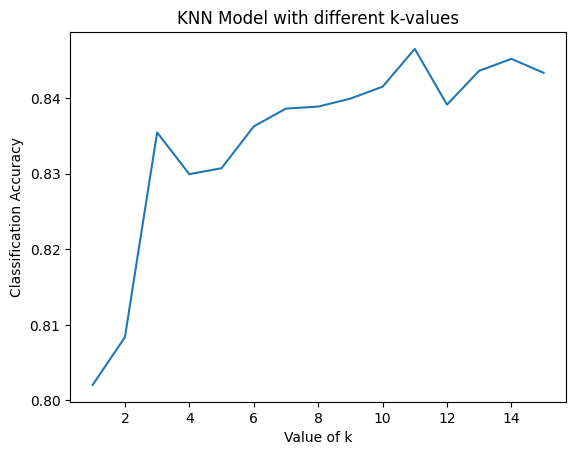

In [8]:
# Calculate and Graph classification accuracy vs k values
# Note: The Data is already saved as normalized

K = np.arange(1, 16)
test_accuracy = []

# Train the model on various values of k
for k in K:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    clf = KNeighborsClassifier(n_neighbors=k, weights="distance").fit(X_train, y_train)
    test_accuracy.append(clf.score(X_test, y_test))

# Graph it
plt.title("KNN Model with different k-values")
plt.plot(K, test_accuracy)
plt.xlabel("Value of k")
plt.ylabel("Classification Accuracy")
plt.show()


*Discussion*

Using the normalized input and distance weighted, I experimented with various k-values for the KNN model. The k-value represents the number of k-nearest nodes that the model takes the vote of when predicting the class of an input vector. As k increases, the model is much less likely to overfit since the majority vote of the nodes is less likely to contain noise. But, if k is too large, it may decrease overall accuracy by giving more vote to further nodes.

On this specific data set, the test accuracy improved from 80% to 85% as the value of k increased from 1 to 15. This was not a surprise because increasing the k-value decreases the likelihood that a model overfits. For this particular problem, it may be optimal to use a k-value of about 6. This is because after 6, the test accuracy does not see much improvement.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

In [9]:
Data_Set = arff.loadarff('Housing.arff')
iris_df = pd.DataFrame(Data_Set[0])
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# Remove the unethical data
X = np.delete(X, 11, 1)

# Cast to float
X = X.astype(np.float64)
y = y.astype(np.float64)

# Run the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNeighborsRegressor().fit(X_train, y_train)

print("Training Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

Training Accuracy: 0.7509630866342464
Test Accuracy: 0.46004429745084396


*Discuss the innapropriate feature*

This time I imported a data set used to predict housing prices and ran the KNN regressor on it. However, after looking at the set, I discovered that the 12th feature may be unethical. This feature measured the proportion of blacks in the town. Because of the racist past of our country, housing prices in black communities have likely been lower than those of other communities. This model may use the statistic to estimate lower than accurate housing prices in these black communities. This would promote systemic racism, making black communities less likely to increase their standard of living. So, in order to avoid this problem, I removed the entire feature from the data set and will not be using it in my future analysis.


### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [27]:
Data_Set = arff.loadarff('Housing.arff')
iris_df = pd.DataFrame(Data_Set[0])
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# Remove the unethical data
X = np.delete(X, 11, 1)

# Cast to float
X = X.astype(np.float64)
y = y.astype(np.float64)


# No input normalization and no distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("_____No input normalization and no distance weighting_____")
print("Training Score:", clf.score(X_train, y_train))
print("Test Score:", clf.score(X_test, y_test))
print("Training MAE", mean_absolute_error(clf.predict(X_train), y_train))
print("Testing MAE", mean_absolute_error(clf.predict(X_test), y_test))
print()

# Input normalization but no distance weighting
from sklearn import preprocessing as p
X = p.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("_____Input normalization but no distance weighting_____")
print("Training Score:", clf.score(X_train, y_train))
print("Test Score:", clf.score(X_test, y_test))
print("Training MAE", mean_absolute_error(clf.predict(X_train), y_train))
print("Testing MAE", mean_absolute_error(clf.predict(X_test), y_test))
print()

# Input normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNeighborsRegressor(n_neighbors=3, weights="distance").fit(X_train, y_train)
print("_____Input normalization and distance weighting_____")
print("Training Score:", clf.score(X_train, y_train))
print("Test Score:", clf.score(X_test, y_test))
print("Training MAE", mean_absolute_error(clf.predict(X_train), y_train))
print("Testing MAE", mean_absolute_error(clf.predict(X_test), y_test))

_____No input normalization and no distance weighting_____
Training Score: 0.7965858326027181
Test Score: 0.6349850461094113
Training MAE 2.646287128712871
Testing MAE 4.037254901960784

_____Input normalization but no distance weighting_____
Training Score: 0.8924492059426781
Test Score: 0.7498782900066746
Training MAE 1.9547854785478544
Testing MAE 3.243464052287581

_____Input normalization and distance weighting_____
Training Score: 1.0
Test Score: 0.7717819193832738
Training MAE 0.0
Testing MAE 3.0033554920882835


*Discuss your results*

This time, using the input set without the unethical feature, I ran the KNN Regressor. First, I did it without normalization and without distance weighting. This yielded a training score of 81%, testing score of 64%. Also, the training mean average error was 2.6 and testing MAE was 48. These results were not optimal. So, I ran the same model, but this time with the input normalized. This improved the both the training and test accuracies by about 10%. Also, it decreased the testing MAE by 1.1. This makes sense becuase the original data set had some features with very large numbers and others with small ones. Normalizing meade each feature have an equal impact on the model.

Finally, I ran the same model agian. But, this time I added distance weighting to give the closer nodes more say in each vote. This vastly improved the training accuracy, making it 100%. And, it reduced the training MAE to 0.But, it only marginally improved testing score/MAE. So, all in all, it was the best way to run the model.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

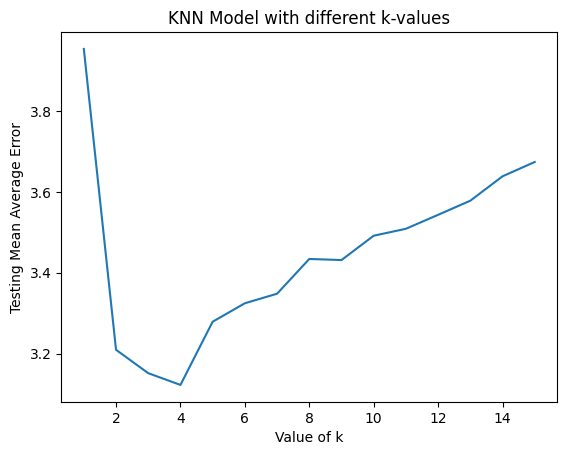

In [35]:
# Learn and graph for different k values

K = np.arange(1, 16)
MAE = []

# Note: The data is already normalized
# Train the model on various values of k
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
for k in K:
    clf = KNeighborsRegressor(n_neighbors=k, weights="distance").fit(X_train, y_train)
    MAE.append(mean_absolute_error(clf.predict(X_test), y_test))

# Graph it
plt.title("KNN Model with different k-values")
plt.plot(K, MAE)
plt.xlabel("Value of k")
plt.ylabel("Testing Mean Average Error")
plt.show()

Discussion

This time, I analyzed the effects of the value for k on the KNN Regressor. The k-value represents the number of neighbors that are used to vote for each input. When k was 1, the model had a large testing mean average error. This makes sense because it was lenient to noise. As k increased to 4, the MAE was minimized at about 3.2. However, as k increased beyond 4, the MAE actually increased once again. Initially, I was surprised to see this. But, I realized that if k is too high, nodes that are actually far away from the node get to vote. This decreases the overall accuracy because the input is more likely to be similar to the nodes that it is closer too. So, for this particular case, I beleive that the optimal value for k is 4.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [66]:
# Train/Predict lymph with your own distance metric
Data_Set = arff.loadarff('lymph.arff')
iris_df = pd.DataFrame(Data_Set[0])
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, 1:-1]
y = Data_Set_np[:, 0]

# Convert nominal data to integers (following same pattern as .arff file)

# All binary yes and no's  (automatically will follow 0/1 function)
X[X == b'no'] = 1
X[X == b'yes'] = 2

# Class
y[y == b'normal'] = 1
y[y == b'arched'] = 2
y[y == b'deformed'] = 3
y[y == b'displaced'] = 4

# Feature 10
X[X == b'bean'] = 1
X[X == b'oval'] = 2
X[X == b'round'] = 3

# Feature 11, 12
X[X == b'lacunar'] = 2
X[X == b'lac_margin'] = 3
X[X == b'lac_central'] = 4

# Feature 13
X[X == b'grainy'] = 2
X[X == b'drop_like'] = 3
X[X == b'coarse'] = 4
X[X == b'diluted'] = 5
X[X == b'reticular'] = 6
X[X == b'stripped'] = 7
X[X == b'faint'] = 8

# Feature 14
X[X == b'chalices'] = 2
X[X == b'vesicles'] = 3

X = X.astype(np.float64)
y = y.astype(np.float64)

In [123]:
def mydist(x, y):
    """
    Calculate the distance between two vectors
    If the features are nomiral, uses a 0/1 distance
    If the features are real, uses Euclidean
    """
    # Note, binary features can be accounted for like real ones
    # (since the function returns the same result either way)
    nominal_features = [0, 10, 11, 12, 13, 14]   # indices of the nominal feautres
    distance = 0
    for i in range(len(x)):
        if i in nominal_features:
            if x[i] != y[i]:    # If nominal value not the same
                distance += 1
        else:
            distance += abs(x[i] - y[i])**2   # If continuous, use square of distance diffences
    return distance ** (1/2)     # Make if Euclidean

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNeighborsClassifier(n_neighbors=3, weights="distance", metric=mydist).fit(X_train, y_train)
print("Training Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.5


*Explain your distance metric and discuss your results*

This time, I ran the KNN model on the lymph data set. This data set had both nominal and real data. So, first, I manually edited the attributes in each feature to make them integers (using the same key as the one in the arff file). Then, I created my own distance function to measure the distance. Using a stored list of the indices of the nominal data, this function returned a distance of 1 if the nominal features were different and 0 if they were the same. Then, for the real inputs, the square of the differences was added. I treated the binary data as real since it would yield the same results either way. Finally, for the total distance for each input, I added the nominal distances and real distances and took the square root (making it resemble the standard Euclidean distance).

After creating this function, I ran the KNeighborClassifier on it with my new distance function. I also used a k-value of 3 and the weighted distance measure. This resulted in a training accuracy of 100%. But, the test accuracy was only 40-50%, which was much less than expected. This accuracy is sill better than nothing (since baseline accuracy is about 25%). But, it was definately not perfect. This means that the model overfit the data. More analysis is needed to determine the root of this overfit.

## 5. (Optional 15% extra credit) Code up your own KNN Learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results

In [160]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import linalg as la

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance', k=1, distance_weighting=False): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type
        self.k = k        # Number of nearest neighbors
        self.distance_weighting = distance_weighting

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.X = data
        self.y = labels
        return self

    def nearest_neighbors(self, data):
        """
        Finds the k nearest neighbors of a specific instance
        Returns the indices of the k nearest neighbor and its distance
        Also returns corresponding distances
        """
        neighbors = []
        norms = []   #list of distances
        distances = []   # used for k smallest distances
        for point in self.X:
            norms.append(la.norm(point - data))   #add distance of each point
        nearest_neighbor = self.X[np.argmin(norms)]
        for i in range(self.k):
            neighbors.append(np.argmin(norms))
            distances.append(min(norms))
            norms[np.argmin(norms)] = np.inf # Set to infity so no longer smallest
        return neighbors, distances   #returns the points with smallest distance and its distance


    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        predictions = []
        for point in data:
            # find nearest neighbors and corresponding distances to corresponding point
            k_nearest_neighbors, distances = self.nearest_neighbors(point)
            guesses = self.y[k_nearest_neighbors]    # To store classes of each of the nearest neighbors
            if not self.distance_weighting:    # No distance weighting, pick top vote
                set_of_classes = set()
                for guess in guesses:
                    set_of_classes.add(guess)   # Find which target values exist in k neighbors
                classes = sorted(set_of_classes)
                scores = [0] * len(set_of_classes)  # To store distance value
                for i in range(len(guesses)):    # For each class prediction in k-nearest neighbors
                    scores[classes.index(guesses[i])] += 1
                prediction = classes[np.argmax(scores)]    # Find class prediction based on highest score
            else:     # Distance weighting
                set_of_classes = set()
                for guess in guesses:
                    set_of_classes.add(guess)   # Find which target values exist in k neighbors
                classes = sorted(set_of_classes)
                scores = [0] * len(set_of_classes)  # To store weighted distance value
                for i in range(len(guesses)):    # For each class prediction in k-nearest neighbors
                    if distances[i] == 0:  weight = np.inf  # Avoid dividing by 0
                    else:  weight = 1 / (distances[i] ** 2)
                    scores[classes.index(guesses[i])] += weight
                prediction = classes[np.argmax(scores)]    # Find class prediction based on highest score
            predictions.append(prediction)
        return predictions

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        prediction = self.predict(X)
        i = 0
        num_incorrect = 0
        for guess in prediction:
            if guess != y[i]:
                num_incorrect += 1
            i += 1
        return 1 - num_incorrect / len(y)

In [166]:
Data_Set = arff.loadarff('magic_telescope.arff')
iris_df = pd.DataFrame(Data_Set[0])
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets and make it binary
X = Data_Set_np[:, :-1]
X = X.astype(float)
y = Data_Set_np[:, -1]
y[y == b'g'] = 0
y[y == b'h'] = 1
y = y.astype(float)

# Training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNNClassifier(k=3).fit(X_train, y_train)
print("Training Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

Training Accuracy: 0.8843980021030494
Test Accuracy: 0.8012618296529969


In [167]:
Data_Set = arff.loadarff('Housing.arff')
iris_df = pd.DataFrame(Data_Set[0])
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# Remove the unethical data
X = np.delete(X, 11, 1)

# Cast to float
X = X.astype(np.float64)
y = y.astype(np.float64)

from sklearn import preprocessing as p
X = p.MinMaxScaler().fit_transform(X)
# Input normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = KNNClassifier(k=3, distance_weighting=True).fit(X_train, y_train)
print(clf.score(X_train, y_train))

print("Training Score:", clf.score(X_train, y_train))
print("Test Score:", clf.score(X_test, y_test))
print("Training MAE", mean_absolute_error(clf.predict(X_train), y_train))
print("Testing MAE", mean_absolute_error(clf.predict(X_test), y_test))

1.0
Training Score: 1.0
Test Score: 0.019607843137254943
Training MAE 0.0
Testing MAE 3.8774509803921564


*Discussion*

I created the KNN Learner myself with the code above. For my code, I first implemented a function to find the k-nearest neighbors of a specific instance (based on the Euclidean algorithm). For this assignment, I used the brute-force method. So, it took quite a long time for the algorithm to run on the large "magic_telescope" data file. But, if I were to do it again, I would implemenet a K-tree algorithm to improve the runtime. Also, in my algorithm, I allowed users to choose if they want distance weighting or not. If they did, the algorithm used a formula to weight the votes based on distance. Otherwise, it just selected the majority vote. My algorithm works both for regression and classification.

Overall, my algorithm yielded similar results to the classic Sklearn model. For the housing.arff file (with distance weighting), I had an overall training score of about 100%. But, my test accuracy was only 2%. Also, my training MAE was 0 and the tes MAE was 3.87. These results were less accurate than the Sklearn model, but still very accurate. And, for the magic_telescope data, the model took quite a long tie to run. But, its final training accuracy was 88.5% which is the exact same as the training accuracy on the Sklearn model. And, its testing accuracy was 80%.

All in all, I was surprised to see how easy it is to write up a K-Nearest Neighbor algorithm. My algorithm closely resembled Sklearn, but was not quite as accurate. More work is needed to improve the efficiency. But, I now have a much better understanding about how the algorithm works as a whole.